In [8]:
import pandas as pd

data = pd.read_csv('Datasets\\gross-fiscal-deficit.csv')

In [20]:
#This dataset shows the figures of gross fiscal deficit for the different states in Rs. Billion from 1980-81 to 2016-17(B.E.)

In [13]:
data.columns

Index(['1980-81', '1981-82', '1982-83', '1983-84', '1984-85', '1985-86',
       '1986-87', '1987-88', '1988-89', '1989-90', '1990-91', '1991-92',
       '1992-93', '1993-94', '1994-95', '1995-96', '1996-97', '1997-98',
       '1998-99', '1999-00', '2000-01', '2001-02', '2002-03', '2003-04',
       '2004-05', '2005-06', '2006-07', '2007-08', '2008-09', '2009-10',
       '2010-11', '2011-12', '2012-13', '2013-14', '2014-15', '2015-16(RE)',
       '2016-17(BE)'],
      dtype='object')

In [15]:
data.head()

,1980-81,1981-82,1982-83,1983-84,1984-85,1985-86,1986-87,1987-88,1988-89,1989-90,...,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16(RE),2016-17(BE)
States,,,,,,,,,,,,,,,,,,,,,
I. Non-Special Category,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.0,0.000000,0.000000,0.000000
Andhra Pradesh,2.22,2.44,1.72,4.93,5.91,4.35,8.04,5.68,6.73,9.72,...,87.9,124.1,140.1,118,154,175.1,180.4,317.468684,170.049136,204.971578
Bihar,3.36,4.09,4.35,3.28,3.96,3.26,4.61,8.25,5.35,9.94,...,17.1,25.1,52.7,39.7,59.1,65.5,83.5,111.784913,285.054085,160.142680
Chhattisgarh,-,-,-,-,-,-,-,-,-,-,...,1.3,10.3,17.6,-4.1,8,26.6,50.6,80.751271,68.315245,81.112223
Goa,-,-,-,-,-,-,0.61,0.72,0.64,0.95,...,5.4,8.1,12.4,5.7,8.8,11.5,13.5,9.501304,30.379223,32.595155


In [16]:
#Preprocessing

# Select the year columns and convert to period index
def convert_year_cols(year_col):
    year, quarter = year_col.split('-')
    quarter_map = {'81': 1, '82': 2, '83': 3, '84': 4}  # adjust this mapping as needed
    quarter = quarter_map[quarter]
    return pd.Period(year=year, quarter=quarter, freq='Q')

data.fillna(0, inplace=True)  # Replace missing values with 0

C:\Users\Prachi\AppData\Local\Temp\ipykernel_13128\2198303274.py:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.mean(axis=0).plot(kind='line')


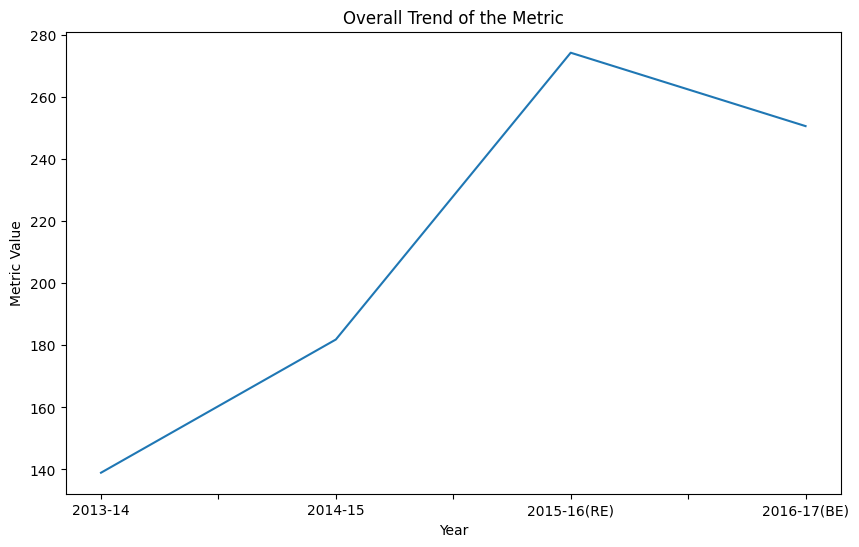

TypeError: no numeric data to plot

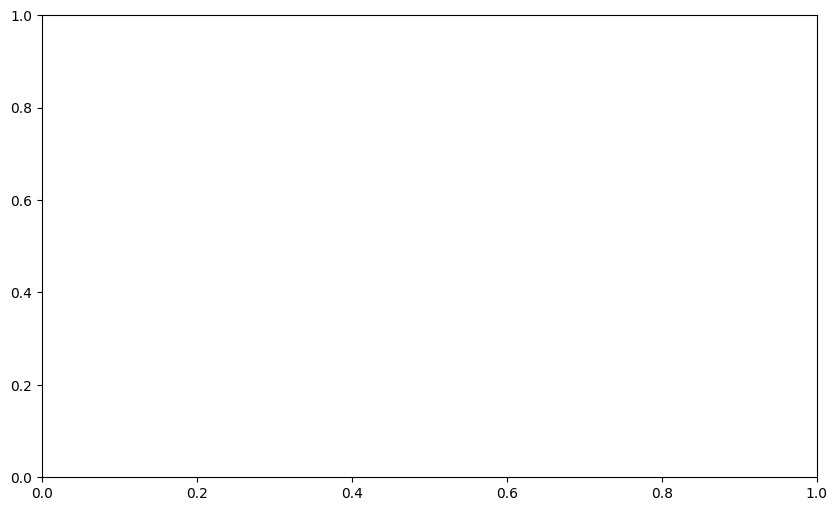

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Line plot to show the overall trend
plt.figure(figsize=(10, 6))
data.mean(axis=0).plot(kind='line')
plt.title('Overall Trend of the Metric')
plt.xlabel('Year')
plt.ylabel('Metric Value')
plt.show()

# Bar chart to compare states in a specific year
year = '1985-86'  # Select a specific year
plt.figure(figsize=(10, 6))
data[year].plot(kind='bar')
plt.title(f'State-wise Metric Values in {year}')
plt.xlabel('State')
plt.ylabel('Metric Value')
plt.show()

# Heatmap to visualize the correlation between states and years
sns.set()
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', square=True)
plt.title('Correlation between States and Years')
plt.show()

# Scatter plot to analyze the relationship between the metric and other factors
# (Assuming we have a separate dataset with GDP and population data)
gdp_data = pd.read_csv('gdp_data.txt')
population_data = pd.read_csv('population_data.txt')

plt.figure(figsize=(10, 6))
sns.scatterplot(x=gdp_data['GDP'], y=data['1985-86'])
plt.title('Relationship between Metric and GDP')
plt.xlabel('GDP')
plt.ylabel('Metric Value')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=population_data['Population'], y=data['1985-86'])
plt.title('Relationship between Metric and Population')
plt.xlabel('Population')
plt.ylabel('Metric Value')
plt.show()